In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import * 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from owslib.wfs import WebFeatureService
from dotenv import load_dotenv

# Create a spark session
spark = (
    SparkSession.builder.appName("analysis")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.driver.memory", "2g")
    .config("spark.executor.memory", "6g")
    .getOrCreate()
)

22/09/20 19:10:01 WARN Utils: Your hostname, DESKTOP-LNDD2A2 resolves to a loopback address: 127.0.1.1; using 172.20.232.118 instead (on interface eth0)
22/09/20 19:10:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/20 19:10:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/09/20 19:10:07 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/09/20 19:10:07 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/09/20 19:10:07 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/09/20 19:10:07 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.


## Population Data 

In [2]:
pop_sdf = spark.read.parquet("../data/curated/pop_sdf.parquet/")
pop_sdf.limit(5)

State/Terr,SA2 code,SA2 name,Total,Under 10,Adolescent,Young adult,Middle age,Old
New South Wales,101021007,Braidwood,4330,473,403,495,1472,1487
New South Wales,101021008,Karabar,8546,1082,1075,1818,2858,1713
New South Wales,101021009,Queanbeyan,11370,1275,916,3129,3681,2369
New South Wales,101021010,Queanbeyan - East,5093,588,406,1460,1718,921
New South Wales,101021012,Queanbeyan West -...,12743,1796,1910,2266,4933,1838


Get sum of each age group and create pie charts for each state and territory.

In [3]:
pop_agg_st = pop_sdf.groupBy("State/Terr") \
    .sum("Under 10", "Adolescent", "Young adult", "Middle age", "Old")

pop_agg_st_df = pop_agg_st.toPandas()

In [4]:
pop_agg_st_df.set_index("State/Terr", inplace=True)

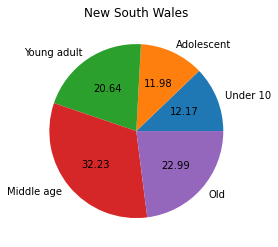

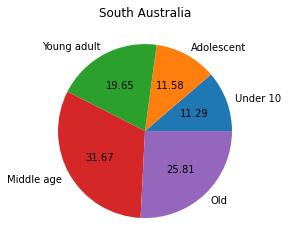

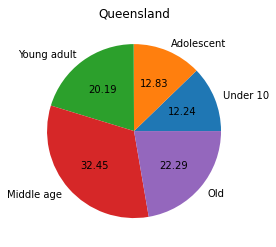

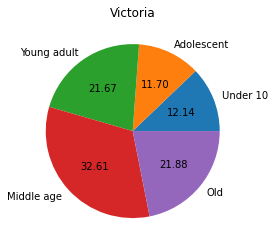

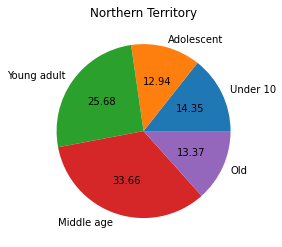

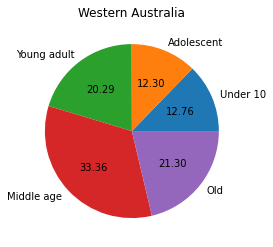

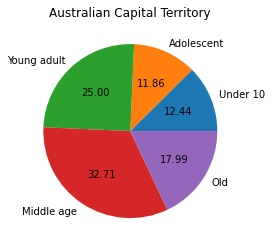

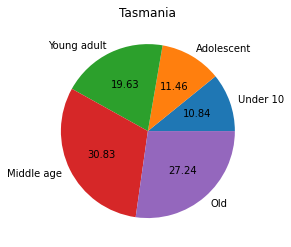

In [5]:
from matplotlib import pyplot as plt

states = list(pop_agg_st_df.index)

groups = {
    'Under 10': [0, 10],
    'Adolescent': [10, 20],
    'Young adult': [20, 35],
    'Middle age': [35, 60],
    'Old': [60, 86]
}

i = 0
for state in states:
    data = list(pop_agg_st_df.loc[state])

    plt.figure(i)
    plt.title(state)
    plt.pie(data, autopct='%.2f', labels=list(groups.keys()))
    
    i += 1

plt.show()

It is evident that the distribution of the age groups for the states and territories are extremely similar.